<a href="https://colab.research.google.com/github/SylGrafe/lab1Repo/blob/master/colab_D01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colabD1 , denselly connected network
more explanations at:
https://github.com/SylGrafe/lab1Repo/blob/master/lab1Sygr0003.pdf


Using TensorFlow backend.


fatal: destination path 'lab1Lib' already exists and is not an empty directory.


Instructions for updating:
Colocations handled automatically by placer.
1 dense layer 512
4423680/4422102 [==============================] - 0s 0us/step
train  model oneLayer for fashion NMIST classification
Instructions for updating:
Use tf.cast instead.
evaluate   model for fashion NMIST classification
10000/10000 [==============================] - 0s 46us/step

************** testRes: [0.3412822011113167, 0.8846]*********** 
saving on colab_D01.json  the model config and  results 
************ dumpOnFile () : append to file  colab_D01.json  

 Dumping object oneLayer in the file  colab_D01.json 
(colab_D01 oneLayer at:3103_0832 
testRes:[0.3413, 0.8846]
compInfo: rmsprop, categorical_crossentropy
info:1 dense layer 512

{'val_loss': [0.3949, 0.398, 0.3822, 0.326, 0.3076, 0.3384, 0.3113, 0.3036, 0.3136, 0.2967], 'val_acc': [0.8572, 0.8528, 0.8638, 0.8818, 0.8865, 0.877, 0.8905, 0.8905, 0.8893, 0.8952], 

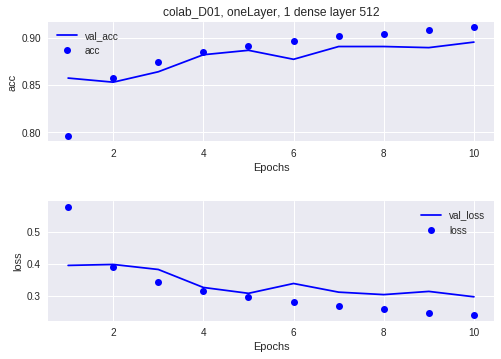

duration: h:0 mn:0 sec:22 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import datetime

from keras import layers
from keras import models
from keras.datasets import fashion_mnist 
from keras.utils import to_categorical
import pickle

# lab1Utils.py is expected to be in the 
# https://github.com/SylGrafe/lab1Lib.git
!git clone https://github.com/SylGrafe/lab1Lib.git
import sys
sys.path.insert(0, "lab1Lib")
import lab1Utils


CAndR = lab1Utils.ConfigAndResults

optimizerStr = 'rmsprop'
lossStr = 'categorical_crossentropy'
theDumpFileName = "colab_D01.json"
codeRef="colab_D01"
startTime= datetime.datetime.now()


# the model seems to overfit really fast
myEpochs=10
myBs=128
# modelStruct parameter

modelStruct="twoLayers"
modelStruct="oneLayer"


compInfoStr= optimizerStr + ", " + lossStr
infoStr="densely connected models"
LastLayerNeuronsNb = 10  # must be 10
startTime = datetime.datetime.now()

theModel = models.Sequential()
if (modelStruct == "oneLayer"):
  L1NeuronsNb = 512
  infoStr="1 dense layer %d" % (L1NeuronsNb)
  theModel.add(layers.Dense(L1NeuronsNb,activation='relu' , input_shape=(28*28,)))
elif (modelStruct == "twoLayers"):
  L2NeuronsNb = 512
  L1NeuronsNb = 512
  infoStr="2 dense layer %d , %d"   % (L1NeuronsNb , L2NeuronsNb) 
  theModel.add(layers.Dense(L1NeuronsNb,activation='relu' , input_shape=(28*28,)))

  theModel.add(layers.Dense(L1NeuronsNb,activation='relu' , input_shape=(28*28,)))
else:
  print ("*** FATAL INVALID modelStruct ******* ")
  sys.exit(1)

print (infoStr )
theModel.add(layers.Dense(LastLayerNeuronsNb,activation='softmax'))

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_images))

train_images = train_images[indexes]
train_labels = train_labels[indexes]


doPrintImages = True
if doPrintImages :
  # for visualisation puropose save the train images and  train labels before reshaping 
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  train_images_orig = train_images
  train_labels_orig= train_labels
  test_images_orig = test_images
  test_labels_orig= test_labels
  
  

theModel.compile (optimizer=optimizerStr , loss=lossStr ,
         metrics=['accuracy'])
train_images = train_images.reshape ((60000 , 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape ((10000 , 28*28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical (train_labels)
test_labels = to_categorical (test_labels)



# now set-aside 10% of the train_images/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_images))

# first pick validation set from train_images/labels
val_data = train_images[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_images2 = train_images[val_count:,:]
train_labels2 = train_labels[val_count:,:]

# NOTE: We will train on train_images2/train_labels2 and 
# cross-validate on val_data/val_labels



print ("train  model %s for fashion NMIST classification" % (modelStruct))
theFit= theModel.fit (train_images2, train_labels2, 
    epochs=myEpochs , verbose=0, batch_size=myBs,
    validation_data=(val_data, val_labels))

print ("evaluate   model for fashion NMIST classification")
testRes =  theModel.evaluate (test_images , test_labels)

#print ("theModel.metrics_names : *s" ,  theModel.metrics_names )
print ("\n************** testRes: %s*********** " % (testRes))

# save the results on disk
print ("saving on %s  the model config and  results " % (theDumpFileName))

res= CAndR (modelStruct ,compInfoStr , theFit.history ,  theFit.params , 
 startTime.strftime("%d%m_%H%M")  , testRes= testRes ,
            codeRef=codeRef , info=infoStr)


lab1Utils.dumpOnFile (res , theDumpFileName)

print (res.toString())
lab1Utils.plotHist (res )


#  how much time does this take ?
stopTime = datetime.datetime.now()
duration = stopTime - startTime
seconds = duration.total_seconds()
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60

#print ( "start : " , startTime.strftime("%a, %d %B %Y %H:%M:%S"))
#print ( "stop at: " , stopTime.strftime("%a, %d %B %Y %H:%M:%S"))
print ( "duration: h:%d mn:%d sec:%d " % (hours , minutes , seconds))



[[877   2  27   8   4   2  73   0   7   0]
 [  1 974   1  19   2   0   2   0   1   0]
 [ 17   0 789   6 147   0  40   0   1   0]
 [ 23   6  28 870  44   0  23   0   6   0]
 [  0   0  56  26 876   0  39   0   3   0]
 [  0   0   0   1   0 971   0  18   2   8]
 [149   2 106  16 116   0 599   0  12   0]
 [  0   0   0   0   0  11   0 972   1  16]
 [  3   1   4   3   5   1   3   4 976   0]
 [  0   0   0   0   0   9   1  48   0 942]]
ind=250 Ankle boot -->Sneaker 


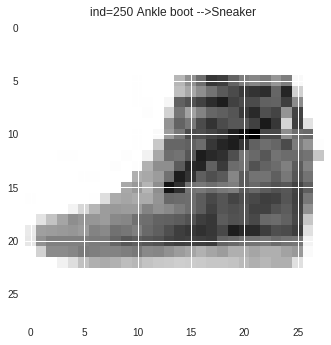

In [2]:





# get predictions print confusion matrics
pred = theModel.predict( test_images)
from sklearn.metrics import confusion_matrix 
import numpy as np
predicted_labels=np.argmax(pred,axis=1)
true_labels = np.argmax(test_labels, axis=1)

cm2=confusion_matrix(true_labels , predicted_labels)
print (cm2)

if doPrintImages :
  #  visualize some wrong predictions
  ind0=250
  for ind in range( ind0 , len(test_labels)):
    l_orig = test_labels_orig[ind] 
    l_pred=  predicted_labels[ind]
    if (l_orig != l_pred) :
      titleStr = "ind=%d %s -->%s "  % (      
      ind , class_names [l_orig] ,class_names [l_pred] )
      print (titleStr)
      plt.title(titleStr)
      plt.imshow(test_images_orig[ind])
      break
  



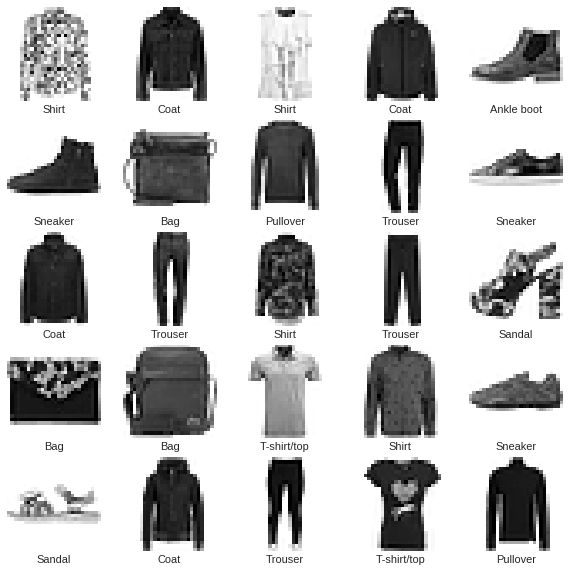

In [3]:
if (doPrintImages):
# visualize the training data .
  offset=1500

  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_orig[offset+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_orig[offset+i]])
  plt.show()



In [4]:
! ls colab_D01.json

colab_D01.json


In [0]:
from google.colab import files
files.download(theDumpFileName)


end of notebook

